In [1]:
from main_script import main, demonstration
main()

[(5, ['user5', 'Super Mario Bros', 'Silent Hill', 'Splatoon', 'Bioshock', 'Forza Horizon', 'Dota 2', 'Minecraft', 'Animal Crossing', 'StarCraft', 'Forza Horizon', 'Animal Crossing', 'Minecraft']), (1, ['user1', 'League of Legends', 'Bayonetta', 'Fire Emblem', 'Uncharted', 'Animal Crossing', 'Far Cry', 'Portal', 'Dragon Age', 'Grand Theft Auto V', 'Red Dead Redemption 2', 'Super Mario Bros', 'Metal Gear Solid', 'Ghost of Tsushima', 'World of Warcraft', 'Dragon Age']), (6, ['user6', 'Ghost of Tsushima', 'Bloodborne', 'Super Mario Bros', 'Horizon Zero Dawn', 'League of Legends', 'Bayonetta', 'Far Cry', 'Gears of War', "Assassin's Creed", 'The Last of Us', 'Sekiro', 'Bayonetta', 'The Last of Us', 'Battlefield']), (2, ['user2', 'Diablo', 'League of Legends', 'Silent Hill', 'Sekiro', 'The Legend of Zelda', 'Mass Effect', 'Battlefield', 'Half-Life', 'Red Dead Redemption 2', 'Metroid', 'The Last of Us', 'Spider-Man', 'The Elder Scrolls V: Skyrim', 'Fortnite', 'Resident Evil', 'Bioshock', 'The 

In [2]:
demonstration()

probe_function: sep
[(5, ['user5', 'Super Mario Bros', 'Silent Hill', 'Splatoon', 'Bioshock', 'Forza Horizon', 'Dota 2', 'Minecraft', 'Animal Crossing', 'StarCraft', 'Forza Horizon', 'Animal Crossing', 'Minecraft']), (1, ['user1', 'League of Legends', 'Bayonetta', 'Fire Emblem', 'Uncharted', 'Animal Crossing', 'Far Cry', 'Portal', 'Dragon Age', 'Grand Theft Auto V', 'Red Dead Redemption 2', 'Super Mario Bros', 'Metal Gear Solid', 'Ghost of Tsushima', 'World of Warcraft', 'Dragon Age']), (6, ['user6', 'Ghost of Tsushima', 'Bloodborne', 'Super Mario Bros', 'Horizon Zero Dawn', 'League of Legends', 'Bayonetta', 'Far Cry', 'Gears of War', "Assassin's Creed", 'The Last of Us', 'Sekiro', 'Bayonetta', 'The Last of Us', 'Battlefield']), (2, ['user2', 'Diablo', 'League of Legends', 'Silent Hill', 'Sekiro', 'The Legend of Zelda', 'Mass Effect', 'Battlefield', 'Half-Life', 'Red Dead Redemption 2', 'Metroid', 'The Last of Us', 'Spider-Man', 'The Elder Scrolls V: Skyrim', 'Fortnite', 'Resident Evil

KeyboardInterrupt: 

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24


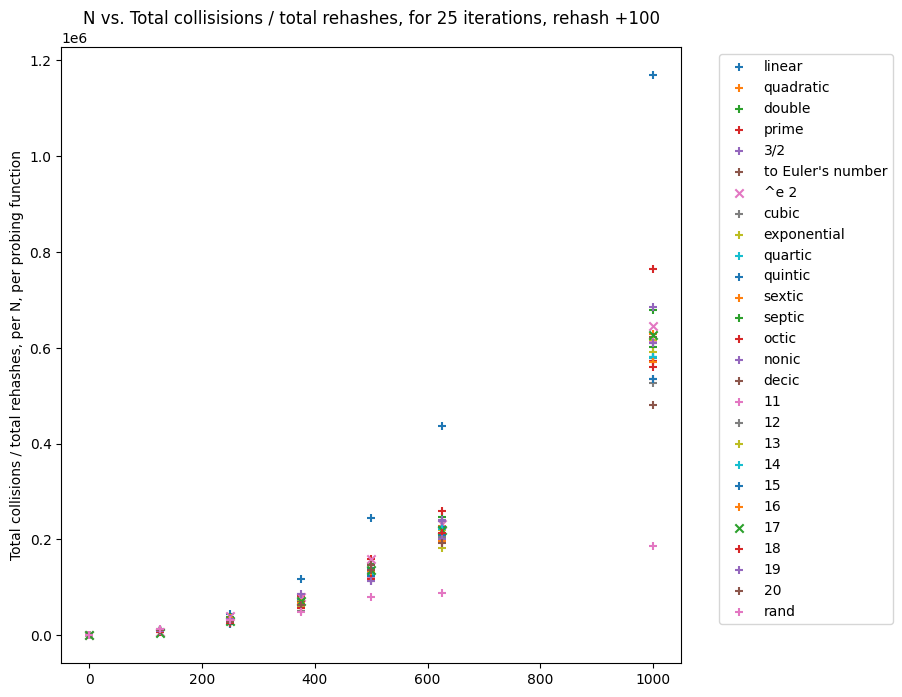

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24


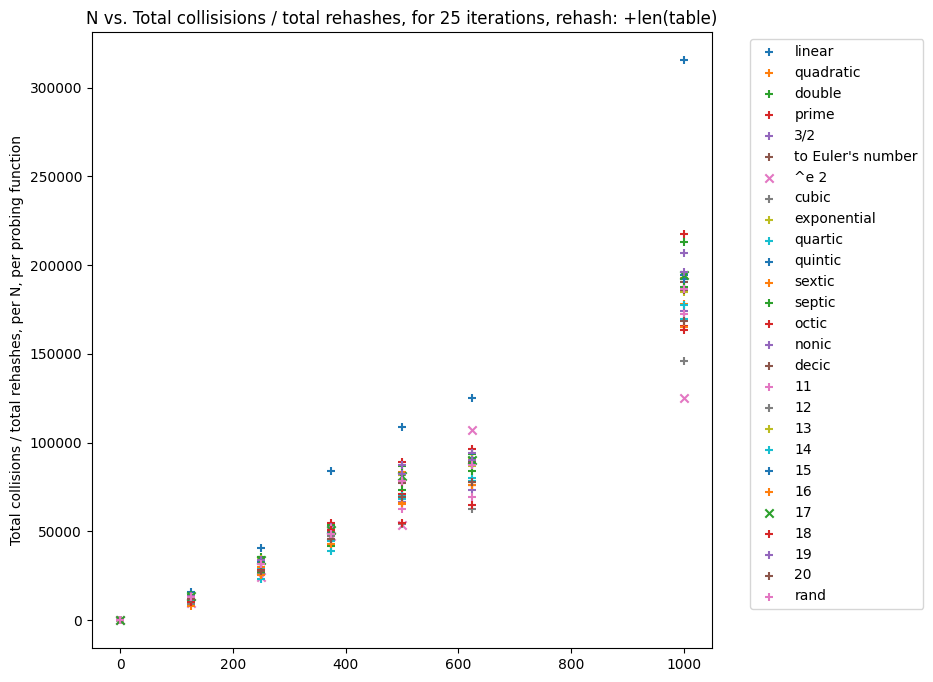

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24


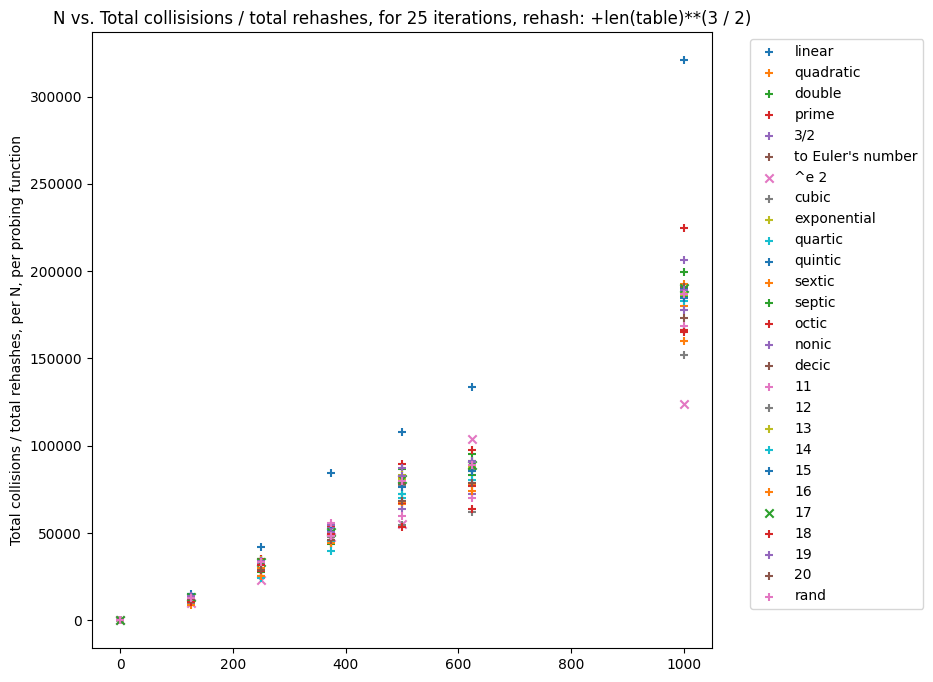

In [3]:
# runtime: predicted: a little more than 2 hours

import csv
from hash_table import HashTable
from random import SystemRandom
# # from matplotlib_venn import venn2, venn3
# from venn import venn
import matplotlib.pyplot as plt
import sys

sys.setrecursionlimit(10000)

# class OrderedSet(list):
#     def __iadd__(self, value):
#         return super().__iadd__(value) if self.count(value) == 0 else None


class ExperimentalHashTable(HashTable):  # this doesn't really need to be a hash table
    # def __init__(self, size, collision_avoidance: str = 'separate chaining', initial_data: list[any] = []) -> None:
    def rand_hash_probing(self, hash1: int, probe: int, hash_size: int) -> int:
        hash2 = self.rand_hash(probe)
        return (hash1 + hash2) % hash_size
    
    def __init__(self, size: int, collision_avoidance: str, initial_data: list[list[int, any]] =[]):
        super().__init__(size, collision_avoidance)
        if collision_avoidance.lower().count('rand') > 0:
            self.probe_function = self.rand_hash_probing
        self.rand_key_dict = HashTable(1)
        self.rand_key_set = HashTable(1)
        if initial_data != []:
            for datum in initial_data:
                self.insert(datum[0], datum[1])

    def rand_hash(self, key: int) -> int:
        # hash_bool = True
        # count = 0
        # while hash_bool:
        if not self.rand_key_dict.contains(key):
            rand_16bits = SystemRandom().getrandbits(16)
            # print(rand_16bits)
            # if not self.rand_key_set.contains(rand_16bits):
            self.rand_key_set.insert(rand_16bits, rand_16bits)
            self.rand_key_dict.insert(key, rand_16bits)
                # hash_bool = False
            # count += 1
            # if count % 100 == 0:
            #     print(f"count: {count}")
        dicted_tuple = self.rand_key_dict.retrieve(key)
        self.rand_key_dict.insert(dicted_tuple[0], dicted_tuple[1])  # could do default value arguments to also accept a tuple directly
        return dicted_tuple[1]  # % len(self.hash_table)  ### with length of 1, all 0
    
    def probe(self, hash_key: int, probe: int) -> int:
        if self.probe_function == self.rand_hash_probing:
            self.collision_count_by_hashsize.append(len(self.hash_table))
            self.collision_count += 1
            return self.probe_function(hash_key, probe, len(self.hash_table))
        else:
            return super().probe(hash_key, probe)

iterations = 25
probing_functions_list = ['linear', 'quadratic', 'double', 'prime', '3/2', "to Euler's number", "^e 2", 'cubic', 'exponential', 'quartic', 'quintic', 'sextic', 'septic', 'octic', 'nonic', 'decic', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'rand']  #, 'rand double hashing']
collisions_data = [HashTable(1) for _ in probing_functions_list]
rehash_count_data = [HashTable(2) for _ in probing_functions_list]

index_keys = [n for n in range(10001)]
# print('keys complete')
for _ in range(iterations):
    print(f"iteration {_}")
    # for N in range(0, 10000, 1000)[0:3]:
    for N in list(range(0, 700, 125)) + [1000]:
        exp_hash_table = ExperimentalHashTable(1, 'sep')  # provides hash vales for key for each iteration * each N, which are the same for each probing function, per N, per iteration
        # print(f"commencing key data:")
        key_data = [exp_hash_table.rand_hash(key) for key in index_keys[0:N]]
        # print('key data complete')
        # print(key_data)  # consider plotting to show randomness
        for probing_function in probing_functions_list[:len(probing_functions_list) - 1]:
            # print(f"probing function: {probing_function}")
            hash_table = HashTable(1, probing_function)  # starts at 2 to avoid integer modulo by 0
            hash_table.rehash_increment = lambda p: 100
            for key in key_data:
                hash_table.insert(key, '')
            collisions_data[probing_functions_list.index(probing_function)].insert(N, hash_table.collision_count)  # hash table does not update values, maybe make update method
            rehash_count_data[probing_functions_list.index(probing_function)].insert(N, hash_table.rehash_count)  ## but it's really useful for this..-
            # print(f"{probing_function} completed for N: {N}")                                                     # todo: compare by sum of collisions / sum of rehashes
        else:
            hash_table = ExperimentalHashTable(2, 'rand')
            for key in key_data:
                hash_table.insert(key, '')
            collisions_data[-1].insert(N, hash_table.collision_count)
            rehash_count_data[-1].insert(N, hash_table.rehash_count)
        
# Idea: cluster hash table - a (HashTable): assuming keys are deliberately colliding, provide statistics per key cluster  ## some of what we wonder about in science is the validity of a given hash function from observations to ... or from theoretical to observations ... or ... 
fig = plt.figure()            # combine multiple hash functions -> 'good' clustering (and/or Monte Carlo the clusters ?)
fig.set_size_inches(8,8)
for label, each, rehash_count in zip(probing_functions_list, collisions_data, rehash_count_data):
    all_tuples = each.get_all()
    all_rehash_counts = rehash_count.get_all()
    # print(all_tuples)
    # all_tuples.sort(key= lambda p: (-p[0], -p[1]))
    # plt.plot([each_tuple[0] for each_tuple in all_tuples], [each_tuple[1] for each_tuple in all_tuples], label=label)
    # plt.scatter([each_tuple[0] for each_tuple in all_tuples], [each_tuple[1] for each_tuple in all_tuples], label=label)  # scatter data looks like the average would look pretty clean
    data_dict = HashTable(2)
    for each_tuple in all_tuples:
        if not data_dict.contains(each_tuple[0]):
            data_dict.insert(each_tuple[0], 0)
        running_sum_tuple = data_dict.retrieve(each_tuple[0])
        data_dict.insert(each_tuple[0], running_sum_tuple[1] + each_tuple[1])
    data_dict_rehash = HashTable(2)
    for each_tuple in all_tuples:
        if not data_dict_rehash.contains(each_tuple[0]):
            data_dict_rehash.insert(each_tuple[0], 0)
        running_sum_tuple = data_dict_rehash.retrieve(each_tuple[0])
        data_dict_rehash.insert(each_tuple[0], running_sum_tuple[1] + each_tuple[1])
    plt.scatter([each_tuple[0] for each_tuple in data_dict.get_all()], [each_tuple[1] for each_tuple in data_dict.get_all()], label=label, marker='x' if (label == '17' or label == '^e 2') else '+')
    # plt.scatter([each_tuple[0] for each_tuple in data_dict.get_all()], [each_tuple[1] / (data_dict_rehash.query(each_tuple[0])[1] if each_tuple[1] != 0 else 1) for each_tuple in data_dict.get_all()], label=label, marker='x' if (label == '17' or label == '^e 2') else '+')
plt.title(f"N vs. Total collisisions / total rehashes, for 25 iterations, rehash +100")
plt.ylabel('Total collisions / total rehashes, per N, per probing function')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# user_data_sets = {}
# with open('user_data_csv.txt', 'r') as open_file:
#     csv_reader = csv.reader(open_file)
#     for row in csv_reader:
#         user = row['user_id']
#         game = row['item_id']
#         if user not in user_data_sets:
#             user_data_sets[user] = set()
#         user_data_sets[user].add(game)

# standard Venn diagrams only go up to 

iterations = 25
probing_functions_list = ['linear', 'quadratic', 'double', 'prime', '3/2', "to Euler's number", "^e 2", 'cubic', 'exponential', 'quartic', 'quintic', 'sextic', 'septic', 'octic', 'nonic', 'decic', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'rand']  #, 'rand double hashing']
collisions_data = [HashTable(1) for _ in probing_functions_list]
rehash_count_data = [HashTable(2) for _ in probing_functions_list]

index_keys = [n for n in range(10001)]
# print('keys complete')
for _ in range(iterations):
    print(f"iteration {_}")
    # for N in range(0, 10000, 1000)[0:3]:
    for N in list(range(0, 700, 125)) + [1000]:
        exp_hash_table = ExperimentalHashTable(1, 'sep')  # provides hash vales for key for each iteration * each N, which are the same for each probing function, per N, per iteration
        # print(f"commencing key data:")
        key_data = [exp_hash_table.rand_hash(key) for key in index_keys[0:N]]
        # print('key data complete')
        # print(key_data)  # consider plotting to show randomness
        for probing_function in probing_functions_list[:len(probing_functions_list) - 1]:
            # print(f"probing function: {probing_function}")
            hash_table = HashTable(1, probing_function)  # starts at 2 to avoid integer modulo by 0
            hash_table.rehash_increment = lambda p: len(p)
            for key in key_data:
                hash_table.insert(key, '')
            collisions_data[probing_functions_list.index(probing_function)].insert(N, hash_table.collision_count)  # hash table does not update values, maybe make update method
            rehash_count_data[probing_functions_list.index(probing_function)].insert(N, hash_table.rehash_count)  ## but it's really useful for this..-
            # print(f"{probing_function} completed for N: {N}")                                                     # todo: compare by sum of collisions / sum of rehashes
        else:
            hash_table = ExperimentalHashTable(2, 'rand')
            for key in key_data:
                hash_table.insert(key, '')
            collisions_data[-1].insert(N, hash_table.collision_count)
            rehash_count_data[-1].insert(N, hash_table.rehash_count)
        
# Idea: cluster hash table - a (HashTable): assuming keys are deliberately colliding, provide statistics per key cluster  ## some of what we wonder about in science is the validity of a given hash function from observations to ... or from theoretical to observations ... or ... 
fig = plt.figure()            # combine multiple hash functions -> 'good' clustering (and/or Monte Carlo the clusters ?)
fig.set_size_inches(8,8)
for label, each, rehash_count in zip(probing_functions_list, collisions_data, rehash_count_data):
    all_tuples = each.get_all()
    all_rehash_counts = rehash_count.get_all()
    # print(all_tuples)
    # all_tuples.sort(key= lambda p: (-p[0], -p[1]))
    # plt.plot([each_tuple[0] for each_tuple in all_tuples], [each_tuple[1] for each_tuple in all_tuples], label=label)
    # plt.scatter([each_tuple[0] for each_tuple in all_tuples], [each_tuple[1] for each_tuple in all_tuples], label=label)  # scatter data looks like the average would look pretty clean
    data_dict = HashTable(2)
    for each_tuple in all_tuples:
        if not data_dict.contains(each_tuple[0]):
            data_dict.insert(each_tuple[0], 0)
        running_sum_tuple = data_dict.retrieve(each_tuple[0])
        data_dict.insert(each_tuple[0], running_sum_tuple[1] + each_tuple[1])
    data_dict_rehash = HashTable(2)
    for each_tuple in all_tuples:
        if not data_dict_rehash.contains(each_tuple[0]):
            data_dict_rehash.insert(each_tuple[0], 0)
        running_sum_tuple = data_dict_rehash.retrieve(each_tuple[0])
        data_dict_rehash.insert(each_tuple[0], running_sum_tuple[1] + each_tuple[1])
    plt.scatter([each_tuple[0] for each_tuple in data_dict.get_all()], [each_tuple[1] for each_tuple in data_dict.get_all()], label=label, marker='x' if (label == '17' or label == '^e 2') else '+')
    # plt.scatter([each_tuple[0] for each_tuple in data_dict.get_all()], [each_tuple[1] / (data_dict_rehash.query(each_tuple[0])[1] if each_tuple[1] != 0 else 1) for each_tuple in data_dict.get_all()], label=label, marker='x' if (label == '17' or label == '^e 2') else '+')
plt.title(f"N vs. Total collisisions / total rehashes, for 25 iterations, rehash: +len(table)")
plt.ylabel('Total collisions / total rehashes, per N, per probing function')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# user_data_sets = {}
# with open('user_data_csv.txt', 'r') as open_file:
#     csv_reader = csv.reader(open_file)
#     for row in csv_reader:
#         user = row['user_id']
#         game = row['item_id']
#         if user not in user_data_sets:
#             user_data_sets[user] = set()
#         user_data_sets[user].add(game)

# standard Venn diagrams only go up to 
# runtime: predicted: a little more than 2 hours

iterations = 25
probing_functions_list = ['linear', 'quadratic', 'double', 'prime', '3/2', "to Euler's number", "^e 2", 'cubic', 'exponential', 'quartic', 'quintic', 'sextic', 'septic', 'octic', 'nonic', 'decic', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'rand']  #, 'rand double hashing']
collisions_data = [HashTable(1) for _ in probing_functions_list]
rehash_count_data = [HashTable(2) for _ in probing_functions_list]

index_keys = [n for n in range(10001)]
# print('keys complete')
for _ in range(iterations):
    print(f"iteration {_}")
    # for N in range(0, 10000, 1000)[0:3]:
    for N in list(range(0, 700, 125)) + [1000]:
        exp_hash_table = ExperimentalHashTable(1, 'sep')  # provides hash vales for key for each iteration * each N, which are the same for each probing function, per N, per iteration
        # print(f"commencing key data:")
        key_data = [exp_hash_table.rand_hash(key) for key in index_keys[0:N]]
        # print('key data complete')
        # print(key_data)  # consider plotting to show randomness
        for probing_function in probing_functions_list[:len(probing_functions_list) - 1]:
            # print(f"probing function: {probing_function}")
            hash_table = HashTable(1, probing_function)  # starts at 2 to avoid integer modulo by 0
            # hash_table.rehash_increment = default value (len(p)**(3 / 2))
            for key in key_data:
                hash_table.insert(key, '')
            collisions_data[probing_functions_list.index(probing_function)].insert(N, hash_table.collision_count)  # hash table does not update values, maybe make update method
            rehash_count_data[probing_functions_list.index(probing_function)].insert(N, hash_table.rehash_count)  ## but it's really useful for this..-
            # print(f"{probing_function} completed for N: {N}")                                                     # todo: compare by sum of collisions / sum of rehashes
        else:
            hash_table = ExperimentalHashTable(2, 'rand')
            for key in key_data:
                hash_table.insert(key, '')
            collisions_data[-1].insert(N, hash_table.collision_count)
            rehash_count_data[-1].insert(N, hash_table.rehash_count)
        
# Idea: cluster hash table - a (HashTable): assuming keys are deliberately colliding, provide statistics per key cluster  ## some of what we wonder about in science is the validity of a given hash function from observations to ... or from theoretical to observations ... or ... 
fig = plt.figure()            # combine multiple hash functions -> 'good' clustering (and/or Monte Carlo the clusters ?)
fig.set_size_inches(8,8)
for label, each, rehash_count in zip(probing_functions_list, collisions_data, rehash_count_data):
    all_tuples = each.get_all()
    all_rehash_counts = rehash_count.get_all()
    # print(all_tuples)
    # all_tuples.sort(key= lambda p: (-p[0], -p[1]))
    # plt.plot([each_tuple[0] for each_tuple in all_tuples], [each_tuple[1] for each_tuple in all_tuples], label=label)
    # plt.scatter([each_tuple[0] for each_tuple in all_tuples], [each_tuple[1] for each_tuple in all_tuples], label=label)  # scatter data looks like the average would look pretty clean
    data_dict = HashTable(2)
    for each_tuple in all_tuples:
        if not data_dict.contains(each_tuple[0]):
            data_dict.insert(each_tuple[0], 0)
        running_sum_tuple = data_dict.retrieve(each_tuple[0])
        data_dict.insert(each_tuple[0], running_sum_tuple[1] + each_tuple[1])
    data_dict_rehash = HashTable(2)
    for each_tuple in all_tuples:
        if not data_dict_rehash.contains(each_tuple[0]):
            data_dict_rehash.insert(each_tuple[0], 0)
        running_sum_tuple = data_dict_rehash.retrieve(each_tuple[0])
        data_dict_rehash.insert(each_tuple[0], running_sum_tuple[1] + each_tuple[1])
    plt.scatter([each_tuple[0] for each_tuple in data_dict.get_all()], [each_tuple[1] for each_tuple in data_dict.get_all()], label=label, marker='x' if (label == '17' or label == '^e 2') else '+')
    # plt.scatter([each_tuple[0] for each_tuple in data_dict.get_all()], [each_tuple[1] / (data_dict_rehash.query(each_tuple[0])[1] if each_tuple[1] != 0 else 1) for each_tuple in data_dict.get_all()], label=label, marker='x' if (label == '17' or label == '^e 2') else '+')
plt.title(f"N vs. Total collisisions / total rehashes, for 25 iterations, rehash: +len(table)**(3 / 2)")
plt.ylabel('Total collisions / total rehashes, per N, per probing function')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# user_data_sets = {}
# with open('user_data_csv.txt', 'r') as open_file:
#     csv_reader = csv.reader(open_file)
#     for row in csv_reader:
#         user = row['user_id']
#         game = row['item_id']
#         if user not in user_data_sets:
#             user_data_sets[user] = set()
#         user_data_sets[user].add(game)

# standard Venn diagrams only go up to 

For testing: Illustrate user game sets: 7 users, as on https://canvas.seattlecolleges.edu/courses/28186/assignments/443145


iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24


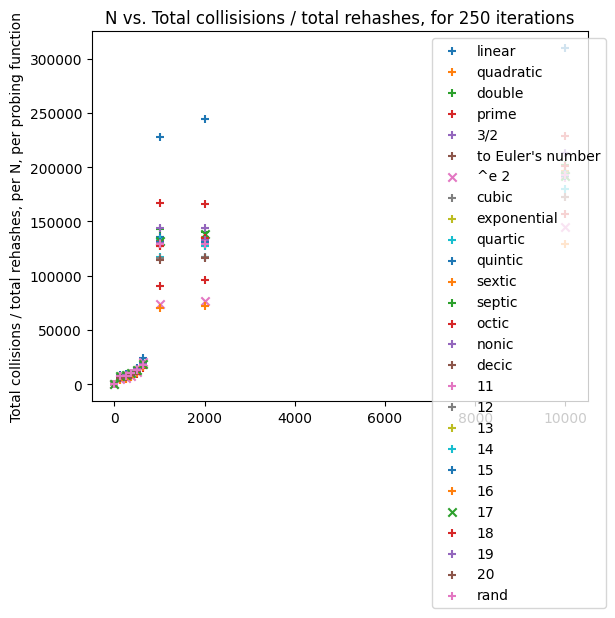

In [3]:
# runtime: predicted: a little more than 2 hours

iterations = 25
probing_functions_list = ['linear', 'quadratic', 'double', 'prime', '3/2', "to Euler's number", "^e 2", 'cubic', 'exponential', 'quartic', 'quintic', 'sextic', 'septic', 'octic', 'nonic', 'decic', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'rand']  #, 'rand double hashing']
collisions_data = [HashTable(1) for _ in probing_functions_list]
rehash_count_data = [HashTable(2) for _ in probing_functions_list]

index_keys = [n for n in range(10001)]
# print('keys complete')
for _ in range(iterations):
    print(f"iteration {_}")
    # for N in range(0, 10000, 1000)[0:3]:
    for N in list(range(0, 700, 125)) + [1000] + [2000] + [10000]:
        exp_hash_table = ExperimentalHashTable(1, 'sep')  # provides hash vales for key for each iteration * each N, which are the same for each probing function, per N, per iteration
        # print(f"commencing key data:")
        key_data = [exp_hash_table.rand_hash(key) for key in index_keys[0:N]]
        # print('key data complete')
        # print(key_data)  # consider plotting to show randomness
        for probing_function in probing_functions_list[:len(probing_functions_list) - 1]:
            # print(f"probing function: {probing_function}")
            hash_table = HashTable(1, probing_function)  # starts at 2 to avoid integer modulo by 0
            for key in key_data:
                hash_table.insert(key, '')
            collisions_data[probing_functions_list.index(probing_function)].insert(N, hash_table.collision_count)  # hash table does not update values, maybe make update method
            rehash_count_data[probing_functions_list.index(probing_function)].insert(N, hash_table.rehash_count)  ## but it's really useful for this..-
            # print(f"{probing_function} completed for N: {N}")                                                     # todo: compare by sum of collisions / sum of rehashes
        else:
            hash_table = ExperimentalHashTable(2, 'rand')
            for key in key_data:
                hash_table.insert(key, '')
            collisions_data[-1].insert(N, hash_table.collision_count)
            rehash_count_data[-1].insert(N, hash_table.rehash_count)
        
# Idea: cluster hash table - a (HashTable): assuming keys are deliberately colliding, provide statistics per key cluster  ## some of what we wonder about in science is the validity of a given hash function from observations to ... or from theoretical to observations ... or ... 
fig = plt.figure()            # combine multiple hash functions -> 'good' clustering (and/or Monte Carlo the clusters ?)
for label, each, rehash_count in zip(probing_functions_list, collisions_data, rehash_count_data):
    all_tuples = each.get_all()
    all_rehash_counts = rehash_count.get_all()
    # print(all_tuples)
    # all_tuples.sort(key= lambda p: (-p[0], -p[1]))
    # plt.plot([each_tuple[0] for each_tuple in all_tuples], [each_tuple[1] for each_tuple in all_tuples], label=label)
    # plt.scatter([each_tuple[0] for each_tuple in all_tuples], [each_tuple[1] for each_tuple in all_tuples], label=label)  # scatter data looks like the average would look pretty clean
    data_dict = HashTable(2)
    for each_tuple in all_tuples:
        if not data_dict.contains(each_tuple[0]):
            data_dict.insert(each_tuple[0], 0)
        running_sum_tuple = data_dict.retrieve(each_tuple[0])
        data_dict.insert(each_tuple[0], running_sum_tuple[1] + each_tuple[1])
    data_dict_rehash = HashTable(2)
    for each_tuple in all_tuples:
        if not data_dict_rehash.contains(each_tuple[0]):
            data_dict_rehash.insert(each_tuple[0], 0)
        running_sum_tuple = data_dict_rehash.retrieve(each_tuple[0])
        data_dict_rehash.insert(each_tuple[0], running_sum_tuple[1] + each_tuple[1])
    # plt.scatter([each_tuple[0] for each_tuple in data_dict.get_all()], [each_tuple[1] for each_tuple in data_dict.get_all()], label=label, marker='x' if (label == '17' or label == '^e 2') else '+')
    # plt.scatter([each_tuple[0] for each_tuple in data_dict.get_all()], [each_tuple[1] / data_dict_rehash.query(each_tuple[0])[1] for each_tuple in data_dict.get_all()], label=label, marker='x' if (label == '17' or label == '^e 2') else '+')
    plt.scatter([each_tuple[0] for each_tuple in data_dict.get_all()], [each_tuple[1] for each_tuple in data_dict.get_all()], label=label, marker='x' if (label == '17' or label == '^e 2') else '+')
plt.title('N vs. Total collisisions / total rehashes, for 250 iterations')
plt.ylabel('Total collisions / total rehashes, per N, per probing function')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()
# user_data_sets = {}
# with open('user_data_csv.txt', 'r') as open_file:
#     csv_reader = csv.reader(open_file)
#     for row in csv_reader:
#         user = row['user_id']
#         game = row['item_id']
#         if user not in user_data_sets:
#             user_data_sets[user] = set()
#         user_data_sets[user].add(game)

# standard Venn diagrams only go up to 

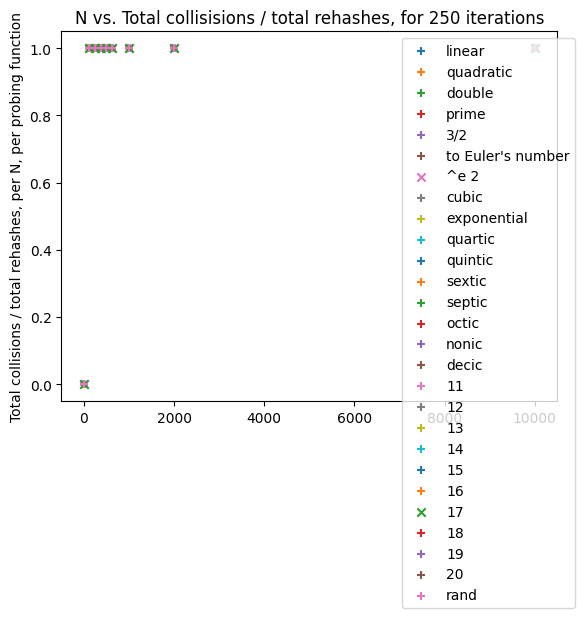

In [4]:
fig = plt.figure()            # combine multiple hash functions -> 'good' clustering (and/or Monte Carlo the clusters ?)
for label, each, rehash_count in zip(probing_functions_list, collisions_data, rehash_count_data):
    all_tuples = each.get_all()
    all_rehash_counts = rehash_count.get_all()
    # print(all_tuples)
    # all_tuples.sort(key= lambda p: (-p[0], -p[1]))
    # plt.plot([each_tuple[0] for each_tuple in all_tuples], [each_tuple[1] for each_tuple in all_tuples], label=label)
    # plt.scatter([each_tuple[0] for each_tuple in all_tuples], [each_tuple[1] for each_tuple in all_tuples], label=label)  # scatter data looks like the average would look pretty clean
    data_dict = HashTable(2)
    for each_tuple in all_tuples:
        if not data_dict.contains(each_tuple[0]):
            data_dict.insert(each_tuple[0], 0)
        running_sum_tuple = data_dict.retrieve(each_tuple[0])
        data_dict.insert(each_tuple[0], running_sum_tuple[1] + each_tuple[1])
    data_dict_rehash = HashTable(2)
    for each_tuple in all_tuples:
        if not data_dict_rehash.contains(each_tuple[0]):
            data_dict_rehash.insert(each_tuple[0], 0)
        running_sum_tuple = data_dict_rehash.retrieve(each_tuple[0])
        data_dict_rehash.insert(each_tuple[0], running_sum_tuple[1] + each_tuple[1])
    # plt.scatter([each_tuple[0] for each_tuple in data_dict.get_all()], [each_tuple[1] for each_tuple in data_dict.get_all()], label=label, marker='x' if (label == '17' or label == '^e 2') else '+')
    plt.scatter([each_tuple[0] for each_tuple in data_dict.get_all()], [each_tuple[1] / (data_dict_rehash.query(each_tuple[0])[1] if each_tuple[1] != 0 else 1) for each_tuple in data_dict.get_all()], label=label, marker='x' if (label == '17' or label == '^e 2') else '+')
plt.title('N vs. Total collisisions / total rehashes, for 250 iterations')
plt.ylabel('Total collisions / total rehashes, per N, per probing function')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()
# user_data_sets = {}
# with open('user_data_csv.txt', 'r') as open_file:
#     csv_reader = csv.reader(open_file)
#     for row in csv_reader:
#         user = row['user_id']
#         game = row['item_id']
#         if user not in user_data_sets:
#             user_data_sets[user] = set()
#         user_data_sets[user].add(game)

# standard Venn diagrams only go up to 

In [5]:
# Choice of rehash increment function makes a difference:

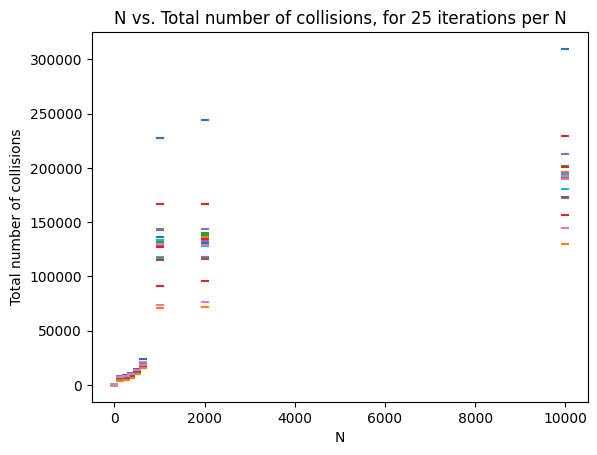

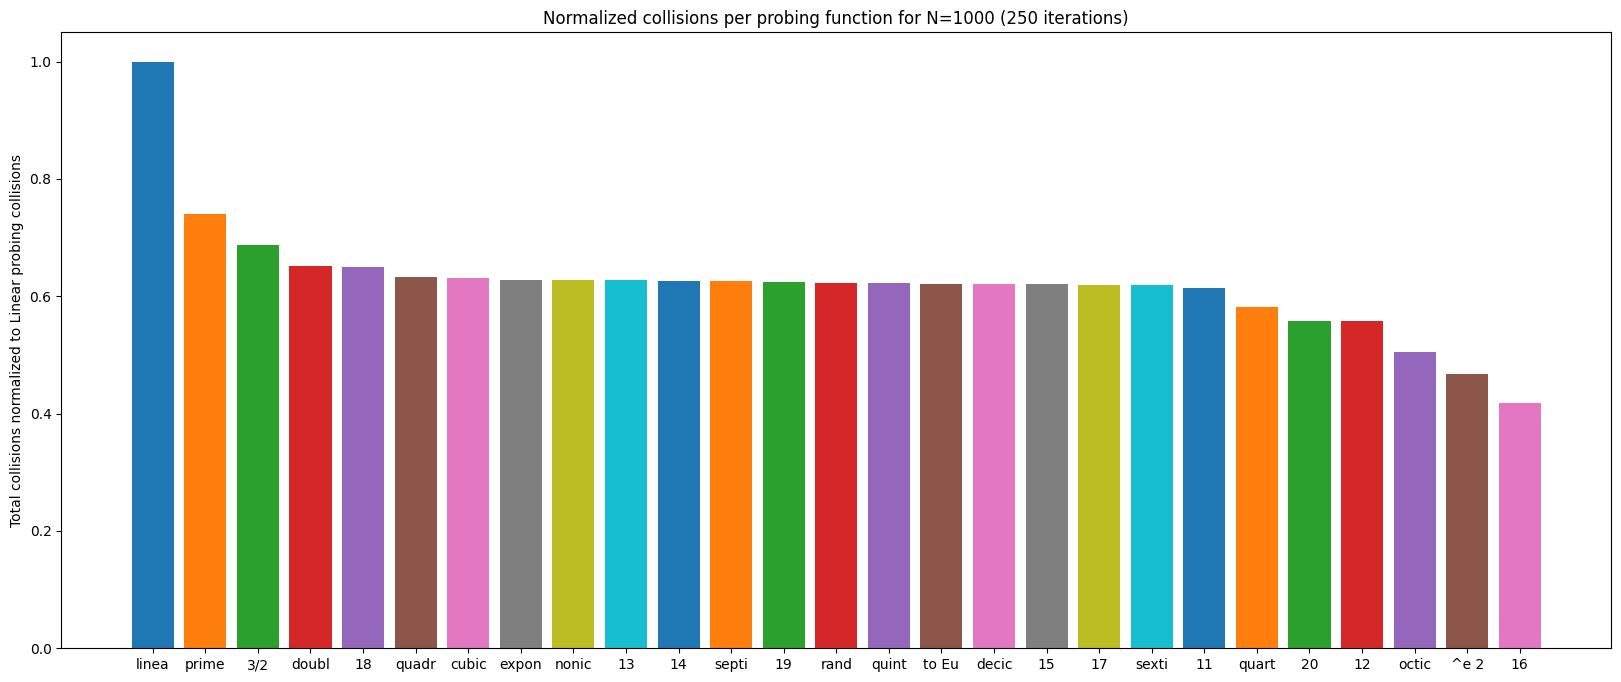

To Eu is int(probe**math.e)
^e 2 is the same at To Eu, however, if the value modulo hash_size is even, 1 is added to the value (mod hash_size)


In [6]:
plt.figure()
for label, each in zip(probing_functions_list, collisions_data):
    all_tuples = each.get_all()
    # print(all_tuples)
    # all_tuples.sort(key= lambda p: (-p[0], -p[1]))
    # plt.plot([each_tuple[0] for each_tuple in all_tuples], [each_tuple[1] for each_tuple in all_tuples], label=label)
    # plt.scatter([each_tuple[0] for each_tuple in all_tuples], [each_tuple[1] for each_tuple in all_tuples], label=label)  # scatter data looks like the average would look pretty clean
    data_dict = HashTable(2)
    for each_tuple in all_tuples:
        if not data_dict.contains(each_tuple[0]):
            data_dict.insert(each_tuple[0], 0)
        running_sum_tuple = data_dict.retrieve(each_tuple[0])
        data_dict.insert(each_tuple[0], running_sum_tuple[1] + each_tuple[1])
    plt.scatter([each_tuple[0] for each_tuple in data_dict.get_all()], [each_tuple[1] for each_tuple in data_dict.get_all()], label=label, marker=SystemRandom().choice(['_']))
plt.title('N vs. Total number of collisions, for 25 iterations per N')
plt.ylabel('Total number of collisions')
plt.xlabel('N')
# plt.legend()
plt.show()
#
plot_point_list = []
fig = plt.figure()
fig.set_size_inches(20, 8)
for label, each in zip(probing_functions_list, collisions_data):
    all_tuples = each.get_all()
    # print(all_tuples)
    # all_tuples.sort(key= lambda p: (-p[0], -p[1]))
    # plt.plot([each_tuple[0] for each_tuple in all_tuples], [each_tuple[1] for each_tuple in all_tuples], label=label)
    # plt.scatter([each_tuple[0] for each_tuple in all_tuples], [each_tuple[1] for each_tuple in all_tuples], label=label)  # scatter data looks like the average would look pretty clean
    data_dict = HashTable(2)
    for each_tuple in all_tuples:
        if not data_dict.contains(each_tuple[0]):
            data_dict.insert(each_tuple[0], 0)
        running_sum_tuple = data_dict.retrieve(each_tuple[0])
        data_dict.insert(each_tuple[0], running_sum_tuple[1] + each_tuple[1])
    from max_heap import MaxHeap
    max_heap_data = MaxHeap()
    for each in data_dict.get_all():
        max_heap_data.push(each[0], each[1])
    plot_point = max_heap_data.top_n(1)[0]
    plot_point_list.append([plot_point, label])
    # plt.scatter([plot_point[0]], [plot_point[1]], label=label, marker=SystemRandom().choice(['_']))
plot_point_list.sort(key= lambda p: -p[0][1])
norm_value = plot_point_list[0][0][1]
for each in plot_point_list:
    plt.bar(plot_point_list.index(each), height=each[0][1] / norm_value, label=label)
plt.title('Normalized collisions per probing function for N=1000 (250 iterations)')
plt.xticks([i for i in range(len(plot_point_list))], labels=[point_list[1][0:5] for point_list in plot_point_list])
# plt.yticks([point_list[0][1] / norm_value for point_list in plot_point_list], labels=[str(point_list[0][1] / norm_value) for point_list in plot_point_list])
# plt.ylim(bottom=plot_point_list[-1][0][1] - 1000)
plt.ylabel('Total collisions normalized to Linear probing collisions')
plt.show()
print("To Eu is int(probe**math.e)")
print("^e 2 is the same at To Eu, however, if the value modulo hash_size is even, 1 is added to the value (mod hash_size)")

In [7]:
class OrderedSet(list):
    def __iadd__(self, value):
        return super().__iadd__(value) if self.count(value) == 0 else None